# Grading Diabetic Retinopathy by Classification

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

2022-11-15 20:26:38.865843: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-15 20:26:38.987791: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-15 20:26:39.012147: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-15 20:26:39.413523: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


2022-11-15 20:26:40.516508: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-15 20:26:40.523992: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-15 20:26:40.524222: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [3]:
train_path = './Dataset/training/'
test_path = './Dataset/testing/'
validation_path = './Dataset/validation/'

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=10)
validation_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=validation_path, target_size=(224,224), batch_size=10)

Found 529 images belonging to 2 classes.
Found 12 images belonging to 2 classes.
Found 19 images belonging to 2 classes.


In [28]:
model = tf.keras.applications.mobilenet.MobileNet(
    input_shape=None,
    alpha=1.0,
    depth_multiplier=1,
    dropout=0.001,
    include_top=True,
    weights=None,
    input_tensor=None,
    pooling=None,
    classes=2,
    classifier_activation='softmax')
model.summary()
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'], callbacks-)

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [31]:
model.fit(x=train_batches,
            steps_per_epoch=len(train_batches),
            validation_data=validation_batches,
            validation_steps=len(validation_batches),
            callbacks=tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5),
            epochs=150,
            verbose=2
)

Epoch 1/150
53/53 - 5s - loss: 0.2029 - accuracy: 0.9187 - val_loss: 1.0076 - val_accuracy: 0.5833 - 5s/epoch - 96ms/step
Epoch 2/150
53/53 - 5s - loss: 0.2658 - accuracy: 0.8979 - val_loss: 0.6754 - val_accuracy: 0.7500 - 5s/epoch - 95ms/step
Epoch 3/150
53/53 - 5s - loss: 0.2083 - accuracy: 0.9206 - val_loss: 1.6309 - val_accuracy: 0.5000 - 5s/epoch - 94ms/step
Epoch 4/150
53/53 - 5s - loss: 0.1679 - accuracy: 0.9414 - val_loss: 2.6502 - val_accuracy: 0.5000 - 5s/epoch - 94ms/step
Epoch 5/150
53/53 - 5s - loss: 0.1490 - accuracy: 0.9395 - val_loss: 0.8064 - val_accuracy: 0.5833 - 5s/epoch - 95ms/step
Epoch 6/150
53/53 - 5s - loss: 0.1275 - accuracy: 0.9509 - val_loss: 3.7873 - val_accuracy: 0.5000 - 5s/epoch - 100ms/step
Epoch 7/150
53/53 - 5s - loss: 0.1442 - accuracy: 0.9357 - val_loss: 1.4282 - val_accuracy: 0.5000 - 5s/epoch - 94ms/step
Epoch 8/150
53/53 - 5s - loss: 0.1949 - accuracy: 0.9338 - val_loss: 0.6227 - val_accuracy: 0.5833 - 5s/epoch - 94ms/step
Epoch 9/150
53/53 - 5s 

In [32]:
test_labels = test_batches.classes

predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=2)
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

2/2 - 0s - 442ms/epoch - 221ms/step


In [33]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [34]:
test_batches.class_indices

{'non-referable': 0, 'referable': 1}

Confusion matrix, without normalization
[[5 5]
 [6 3]]


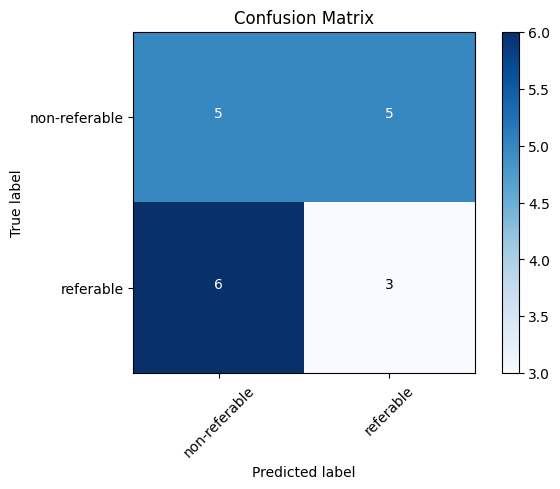

In [35]:
cm_plot_labels = ['non-referable','referable']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
